## GROVER'S ALGORITHM IMPLEMENTATION

In [12]:
import numpy as np
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-11-10 21:20:41,766: Credentials are already in use. The existing account in the session will be replaced.


In [13]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    qc = QuantumCircuit(n, name=name)
    oracle_matrix = np.identity(2**n)
    for i in indices_to_mark:
        oracle_matrix[i, i] = -1
    qc.unitary(Operator(oracle_matrix), range(n))
    return qc

In [14]:
def diffuser(n):
    qc = QuantumCircuit(n, name='Diff - "V"')
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]), range(n))
    qc.h(range(n))
    return qc

In [15]:
def Grover(n, marked):
    qc = QuantumCircuit(n,n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis state {marked} marked, {r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked),range(n))
        qc.append(diffuser(n),range(n))
    qc.measure(range(n), range(n))
    return qc

Text(0, 0.5, '# of times the solution was obtained')

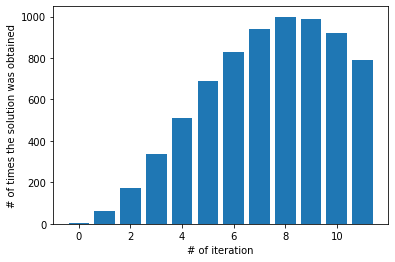

In [23]:
backend = Aer.get_backend('qasm_simulator')
prob_of_ans = []
n=7
x = np.random.randint(2**n)
marked = [x]
# Cycles through number of iterations, in order to calculate the optimum number of iterations
for r in range(12):
    qc = QuantumCircuit(n,n)
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked),range(n))
        qc.append(diffuser(n),range(n))
    qc.measure(range(n), range(n))
    job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
    xbin = '{0:b}'.format(x)
    answer = count[xbin]
    prob_of_ans.append(answer)

iteration = [i for i in range(12)]
correct = prob_of_ans
plt.bar(iteration, correct)
plt.xlabel('# of iteration')
plt.ylabel('# of times the solution was obtained')


In [24]:
n = 4
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n, marked)

qc.draw()

4 qubits, basis state [1] marked, 3 rounds


┌───┐┌─────────┐┌─────────────┐┌─────────┐┌─────────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0            ├┤0        ├┤0            ├┤0        ├»
     ├───┤│         ││             ││         ││             ││         │»
q_1: ┤ H ├┤1        ├┤1            ├┤1        ├┤1            ├┤1        ├»
     ├───┤│  Oracle ││  Diff - "V" ││  Oracle ││  Diff - "V" ││  Oracle │»
q_2: ┤ H ├┤2        ├┤2            ├┤2        ├┤2            ├┤2        ├»
     ├───┤│         ││             ││         ││             ││         │»
q_3: ┤ H ├┤3        ├┤3            ├┤3        ├┤3            ├┤3        ├»
     └───┘└─────────┘└─────────────┘└─────────┘└─────────────┘└─────────┘»
c: 4/════════════════════════════════════════════════════════════════════»
                                                                         »
«     ┌─────────────┐┌─┐         
«q_0: ┤0            ├┤M├─────────
«     │             │└╥┘┌─┐      
«q_1: ┤1            ├─╫─┤M├──────
«     │  Diff - "V" │ ║ └╥┘┌─┐   
«q_2: ┤2            ├─╫──╫─┤M├───
«     │             │ ║  ║ └╥┘┌─┐
«q_3: ┤3            ├─╫──╫──╫─┤M├
«     └─────────────┘ ║  ║  ║ └╥┘
«c: 4/════════════════╩══╩══╩══╩═
«                     0  1  2  3

{'0000': 25, '0001': 9610, '0010': 30, '0011': 20, '0100': 25, '0101': 28, '0110': 29, '0111': 29, '1000': 23, '1001': 32, '1010': 23, '1011': 23, '1100': 15, '1101': 34, '1110': 30, '1111': 24}
2.6082688394304085


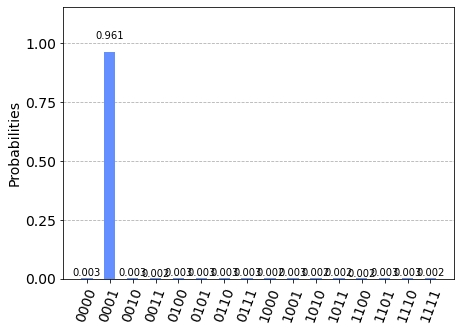

In [25]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 10000).result()
counts = result.get_counts(qc)
print(counts)
print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
plot_histogram(counts)

In [13]:
n = 3 #decreased so noise is not too high
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y==x:
    y = np.random.randint(2**n)
marked = [x,y]
qc = Grover(n,marked)

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits ==5 and not x.configuration().simulator and x.status().operational==True))
print('least busy backend: ', backend)

%qiskit_job_watcher

shots = 1024
job = execute(qc, backend=backend, shots=shots, optimization_level=3)


3 qubits, basis state [2, 0] marked, 1 rounds
least busy backend:  ibmq_athens


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
result = job.result()
answer = result.get_counts()
plot_histogram(answer)